In [17]:
import pandas as pd
import numpy as np

url = "data/clean_data.csv"
df = pd.read_csv(url)

df.head()

"""
da eliminare: ID, work_phone, phone, email, years_employed, occupation_type, housing_type, Num_children
ok: gendro, unemploued, account_length, age, income_type, education_type, family status
da tenere: own_car, own_property,	Num_family, total_income, target
"""


'\nda eliminare: ID, work_phone, phone, email, years_employed, occupation_type, housing_type, Num_children\nok: gendro, unemploued, account_length, age, income_type, education_type, family status\nda tenere: own_car, own_property,\tNum_family, total_income, target\n'

In [18]:
df2 = df.drop(["ID", "Work_phone", "Phone", "Email", "Years_employed", "Occupation_type", "Housing_type", "Num_children"], axis=1)

df2["Age"] = df2["Age"].apply(np.floor)
df2["Age"] = df2["Age"].astype(np.int8)

df2.head()


,Gender,Own_car,Own_property,Unemployed,Num_family,Account_length,Total_income,Age,Income_type,Education_type,Family_status,Target
0,1,1,1,0,2,15,427500.0,32,Working,Higher education,Civil marriage,1
1,1,1,1,0,2,29,112500.0,58,Working,Secondary / secondary special,Married,0
2,0,0,1,0,1,4,270000.0,52,Commercial associate,Secondary / secondary special,Single / not married,0
3,0,0,1,1,1,20,283500.0,61,Pensioner,Higher education,Separated,0
4,1,1,1,0,2,5,270000.0,46,Working,Higher education,Married,0


In [19]:
print(pd.unique(df2["Num_family"]))
print(pd.unique(df2["Account_length"]))
print(pd.unique(df2["Education_type"]))
print(pd.unique(df2["Income_type"]))
print(pd.unique(df2["Family_status"]))

[ 2  1  5  3  4  6 15  7 20  9]
[15 29  4 20  5 17 25 31 44 24 39 43 10 21 40 11  7 12 45 49 30 22 13 16
  8 34  0  3 51 46 56 38 35 33 36 27 26  6 19 47 28 60  9 57 32 55 14 23
 54 58 59 42 37 41  1 48 53 50 52 18  2]
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']


In [20]:
def discretize_num(x):
    if x >=thresh:
      return str(thresh) + "+"
    else:
      return str(x)


In [22]:
thresh = 4

df3 = df2.copy()
df3["Num_family"] = df2["Num_family"].apply(discretize_num)

np.unique(df3["Num_family"], return_counts=True)

(array(['1', '2', '3', '4+'], dtype=object), array([1947, 5183, 1635,  944]))

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

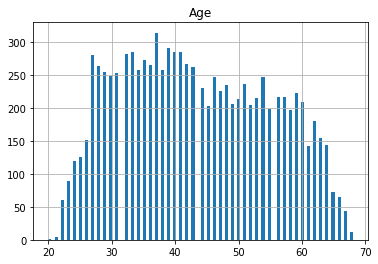

In [23]:
np.unique(df3["Age"], return_counts=True)
df2.hist("Age", bins=100)
# >30, 30-39, 40-49, 50-59, >=60

In [24]:
def discretize_age(x):
  if x<30:
    return "<30"
  elif x<40:
    return "30-39"
  elif x<50:
    return "40-49"
  elif x<60:
    return "50-59"
  else:
    return "60>="  

df3["Age"] = df2["Age"].apply(discretize_age)
np.unique(df3["Age"], return_counts=True)

(array(['30-39', '40-49', '50-59', '60>=', '<30'], dtype=object),
 array([2724, 2445, 2169, 1021, 1350]))

array([[<AxesSubplot:title={'center':'Total_income'}>]], dtype=object)

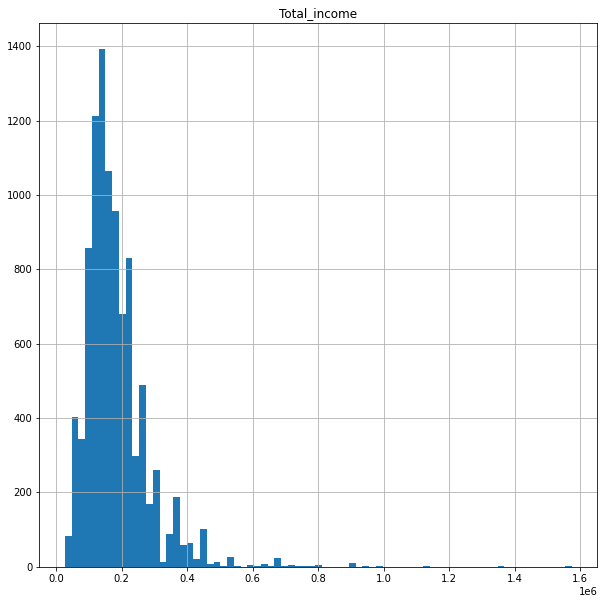

In [25]:
df3.hist("Total_income", bins=75, figsize=(10,10))

Discretization of totali income has been performed considering and equi-frequency kind of splitting

In [26]:
df3["Total_income"] =  pd.qcut(df2['Total_income'], 3, labels=["low", "medium", "high"])
np.unique(df3["Total_income"], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([2777, 4078, 2854]))

array([[<AxesSubplot:title={'center':'Account_length'}>]], dtype=object)

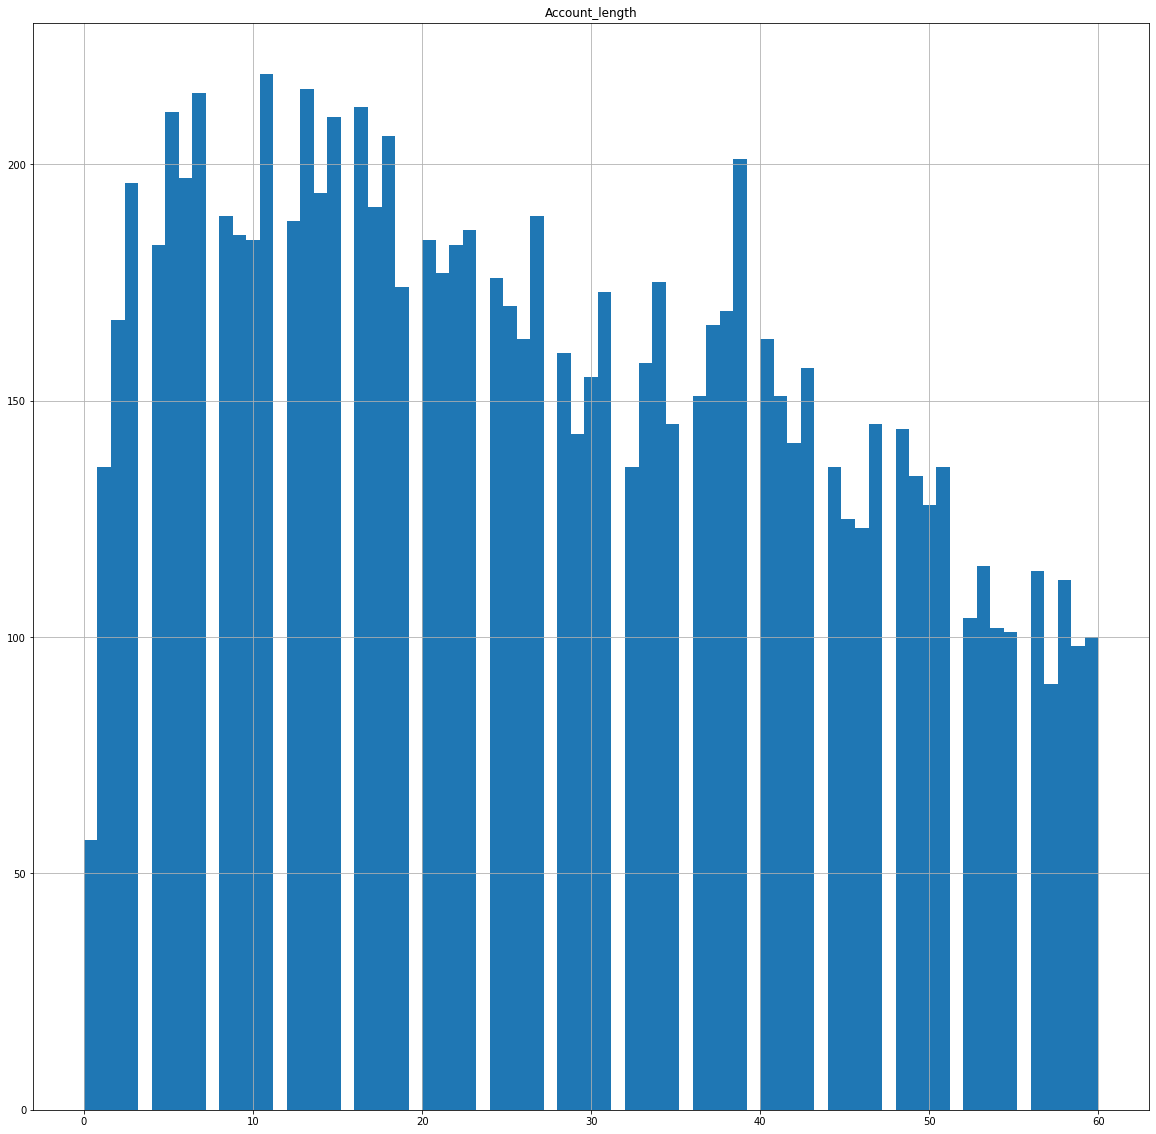

In [27]:
df3.hist("Account_length", bins=75, figsize=(20,20))

In [28]:
def discretize_al(x):
  if x < 12:
    return "<1y"
  elif x < 24:
    return "1y-2y"
  elif x<36:
    return "2y-3y"
  else:
    return "3y+"

df3["Account_length"] = df2["Account_length"].apply(discretize_al)
np.unique(df3["Account_length"], return_counts=True)

(array(['1y-2y', '2y-3y', '3y+', '<1y'], dtype=object),
 array([2321, 1943, 3306, 2139]))

In [31]:
df3["Gender"]       = df3["Gender"].astype(str)
df3["Own_car"]      = df3["Own_car"].astype(str)
df3["Own_property"] = df3["Own_property"].astype(str)
df3["Unemployed"]   = df3["Unemployed"].astype(str)
df3["Target"]       = df3["Target"].astype(str)

dataType = df3.dtypes
print(dataType)

Gender              object
Own_car             object
Own_property        object
Unemployed          object
Num_family          object
Account_length      object
Total_income      category
Age                 object
Income_type         object
Education_type      object
Family_status       object
Target              object
dtype: object


In [ ]:
df3.to_csv('data/processed.csv', encoding = 'utf-8-sig', index=False) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03282642-4d6b-431b-a45f-9f21a6236fff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>